In [1]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pandas as pd

# 데이터 전처리

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('creditcard.csv')
amount = df['Amount']

print(f'{amount} \n\n {type(amount)} \n\n {amount.shape}')

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64 

 <class 'pandas.core.series.Series'> 

 (284807,)


In [3]:
amount_val = amount.values # 시리즈의 value값만 가져옴
amount = amount_val.reshape(-1,1) #amount.shape가 [1]이 없기때문에 reshape하여서 빈곳채움

print(f'{amount} \n\n {type(amount)} \n\n {amount.shape}')

[[149.62]
 [  2.69]
 [378.66]
 ...
 [ 67.88]
 [ 10.  ]
 [217.  ]] 

 <class 'numpy.ndarray'> 

 (284807, 1)


In [4]:
scaler = StandardScaler() #가져온거임

scaler.fit(amount)
amount_scaled = scaler.transform(amount)
amount_scaled


array([[ 0.24496426],
       [-0.34247454],
       [ 1.16068593],
       ...,
       [-0.0818393 ],
       [-0.31324853],
       [ 0.51435531]])

In [5]:
df['normAmount'] = amount_scaled
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [6]:
#데이터셋 확인
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249


In [7]:
df.shape

(284807, 32)

In [9]:
df_x = df.iloc[:,df.columns != 'Class'].copy()
df_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,-0.313249


In [10]:
df_y = df['Class']
df_y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [11]:
df_x = df_x.drop('Amount',axis = 1).copy()
df_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [12]:
df_x['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
81790.0      1
54289.0      1
37651.0      1
112892.0     1
119665.0     1
Name: Time, Length: 124592, dtype: int64

In [13]:
df_x = df_x.drop('Time',axis = 1).copy()
df_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [14]:
df = pd.concat([df_x, df_y],axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [15]:
df.to_csv('credit_test.csv')
df = pd.read_csv('credit_test.csv', index_col=0)

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


-----

# Train set : Test set = 85 : 15 (4번)

In [17]:
X =df.values[:,0:29] #독립변수
Y =df.values[:,29] #종속변수 , 30만
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.15) #85 : 15니까
print(X_train.shape) # 85프로
print(X_test.shape) #15프로

(242085, 29)
(42722, 29)


# DNN 학습 및 저장 / 정확도, Loss 그래프

In [ ]:
#모델 설정
model = Sequential()
model.add(Dense(14, activation='tanh', input_dim=X.shape[1]))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics= ['accuracy'])

# #모델 저장 폴더 지정
MODEL_DIR='./credit/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# #모델 저장 방법
modelpath = './credit/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer =  ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    
# 학습 조기 종료 , callbacks=[checkpointer, early_stopping_callback]
early_stopping_callback= EarlyStopping(monitor='val_loss', patience=100)


#모델 학습
history = model.fit(X_train, Y_train ,validation_split=0.33, epochs=1000, batch_size=1000,
                    callbacks=[checkpointer, early_stopping_callback])
model.summary()

In [ ]:
# 모델 반복횟수에 따른 정확도 및 loss를 그래프로 확인
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))


plt.plot(x_len, y_vloss, 'o', c='red',markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue',markersize=3)
plt.show()

In [ ]:
#학습기 불러오기
from keras.models import load_model
# model.save('09-0.0902.hdf5')
model= load_model('./credit/57-0.0032.hdf5')


#평가
print(model.evaluate(X_test,Y_test))

#예측
prediction = model.predict(X_test)
# print(prediction)
부정자용자 =int(input('가져올 데이터 번호'))
부정사용 = prediction[부정자용자]
p=부정사용[0]*100
print(f'신용카드를 부정사용 확률은 {p}%입니다.')

In [ ]:
y_pred_t = np.round(prediction)
y_pred_t = y_pred_t.astype(int)
y_pred_t.shape

In [ ]:
Y_test_t = Y_test.astype(int)
Y_test_t = Y_test_t.reshape(-1,1)

In [ ]:
Y_test_t.shape

In [ ]:
# 예측값과 실제값 다른것들만 들고와서 보여주기위함
miss = np.where(Y_test_t != y_pred_t)[0]
miss

In [ ]:
# 몇개 잘못 분류 했나?
len(miss)

In [ ]:
i=np.random.choice(miss)
print("True값은 : %s인데, Predic값은 : %s이다"%(Y_test_t[i],y_pred_t[i]))

-----

# 0 : 492개, 1: 492개

In [18]:
df['Class'].value_counts()
# 출력층 몇개 있는지 확인하려고 클래스값 확인

0    284315
1       492
Name: Class, dtype: int64

In [19]:
df_class_0 = df[df['Class'] == 0].sample(492)
df_class_0 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
26225,-1.535821,0.191602,1.616817,0.107770,-0.458116,-0.340610,0.264827,0.473573,-0.545482,-0.984222,...,0.106112,-0.311542,0.112697,-0.122293,0.212961,0.269954,-0.132437,-0.064550,0.231931,0
86319,-0.380287,1.177763,1.525612,0.183458,-0.191871,-1.274917,0.760897,-0.135313,-0.505331,-0.527699,...,-0.222487,-0.551668,0.048063,0.879717,-0.214740,0.037228,0.249072,0.104815,-0.335278,0
177124,-1.017361,1.508147,-0.782430,0.475826,1.075523,-1.540406,0.743348,0.075873,-0.777363,-1.875873,...,0.213252,0.724633,-0.126560,-0.198785,0.374713,0.092894,-0.043317,0.091424,-0.349231,0
27608,-0.758601,-0.195946,2.022157,-2.272191,0.763050,0.551263,0.600992,-0.399396,2.155429,-1.042343,...,-0.184667,0.188097,-0.432666,-1.324006,0.256272,-0.830837,-0.584589,-0.545280,-0.307691,0
156546,-0.625133,0.869436,2.245992,-0.322305,0.297692,0.194029,0.485154,-0.172602,1.292575,-0.873580,...,-0.261078,-0.353379,-0.359366,-0.430072,0.275881,-0.741504,-0.214020,-0.158192,-0.308171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120177,1.226213,-0.489761,0.770496,-0.907153,-1.092935,-0.339341,-0.759104,0.198982,1.755053,-0.877353,...,0.004814,0.173936,-0.075122,-0.003672,0.475684,-0.679911,0.082023,0.019367,-0.349231,0
33327,-0.802557,0.804269,2.801807,0.845983,-0.744898,-0.000065,0.042982,0.195344,-0.108213,-0.296404,...,0.296091,0.956422,-0.244473,0.421427,0.299734,-0.106883,0.366922,0.164440,-0.169237,0
139290,1.308233,-0.430137,-0.115292,-0.622978,-0.757243,-1.152110,-0.022722,-0.294667,-1.492340,0.876893,...,-0.322530,-0.547070,-0.023115,0.578937,0.372956,1.038151,-0.097131,-0.006101,-0.182311,0
62959,0.975164,-1.379533,0.958565,-0.594336,-1.395282,0.787762,-1.291359,0.444900,-0.254946,0.551664,...,0.484783,1.172820,-0.160345,-0.250580,0.203319,-0.015497,0.049435,0.029451,0.206503,0


In [20]:
df_class_0['Class'].value_counts()

0    492
Name: Class, dtype: int64

In [21]:
df_class_1 = df[df['Class'] == 1]
df_class_1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [22]:
df_class_1['Class'].value_counts()

1    492
Name: Class, dtype: int64

In [23]:
df_sample = pd.concat([df_class_0,df_class_1])
df_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
26225,-1.535821,0.191602,1.616817,0.107770,-0.458116,-0.340610,0.264827,0.473573,-0.545482,-0.984222,...,0.106112,-0.311542,0.112697,-0.122293,0.212961,0.269954,-0.132437,-0.064550,0.231931,0
86319,-0.380287,1.177763,1.525612,0.183458,-0.191871,-1.274917,0.760897,-0.135313,-0.505331,-0.527699,...,-0.222487,-0.551668,0.048063,0.879717,-0.214740,0.037228,0.249072,0.104815,-0.335278,0
177124,-1.017361,1.508147,-0.782430,0.475826,1.075523,-1.540406,0.743348,0.075873,-0.777363,-1.875873,...,0.213252,0.724633,-0.126560,-0.198785,0.374713,0.092894,-0.043317,0.091424,-0.349231,0
27608,-0.758601,-0.195946,2.022157,-2.272191,0.763050,0.551263,0.600992,-0.399396,2.155429,-1.042343,...,-0.184667,0.188097,-0.432666,-1.324006,0.256272,-0.830837,-0.584589,-0.545280,-0.307691,0
156546,-0.625133,0.869436,2.245992,-0.322305,0.297692,0.194029,0.485154,-0.172602,1.292575,-0.873580,...,-0.261078,-0.353379,-0.359366,-0.430072,0.275881,-0.741504,-0.214020,-0.158192,-0.308171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [24]:
X =df_sample.values[:,0:29] #독립변수
Y =df_sample.values[:,29] #종속변수 , 31만
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.15) #85 : 15니까
print(X_train.shape) # 85프로
print(X_test.shape) #15프로

(836, 29)
(148, 29)


In [25]:
#모델 설정
model_1 = Sequential()
model_1.add(Dense(12, activation = 'tanh', input_dim=X.shape[1]))
model_1.add(Dense(6, activation = 'relu'))
model_1.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model_1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics= ['accuracy'])

#모델 저장 폴더 지정
MODEL_DIR='./credit_50/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#모델 저장 방법
modelpath = './credit_50/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer =  ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    
# 학습 조기 종료 , callbacks=[checkpointer, early_stopping_callback]
early_stopping_callback= EarlyStopping(monitor='val_loss', patience=10)


# 모델 학습
history = model_1.fit(X_train, Y_train ,validation_split=0.33, epochs=1000, batch_size=20,
                    callbacks=[checkpointer, early_stopping_callback])
model.summary()

Epoch 1/1000
28/28 [==============================] - 1s 33ms/step - loss: 0.7577 - accuracy: 0.5664 - val_loss: 0.5138 - val_accuracy: 0.8080

Epoch 00001: val_loss improved from inf to 0.51379, saving model to ./credit_50\01-0.5138.hdf5
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7895 - val_loss: 0.4121 - val_accuracy: 0.8804

Epoch 00002: val_loss improved from 0.51379 to 0.41213, saving model to ./credit_50\02-0.4121.hdf5
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8554 - val_loss: 0.3637 - val_accuracy: 0.8913

Epoch 00003: val_loss improved from 0.41213 to 0.36371, saving model to ./credit_50\03-0.3637.hdf5
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8710 - val_loss: 0.3268 - val_accuracy: 0.9203

Epoch 00004: val_loss improved from 0.36371 to 0.32678, saving model to ./credit_50\04-0.3268.hdf5
Epoch 5/1000
28/28 [===============

28/28 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9677 - val_loss: 0.1316 - val_accuracy: 0.9565

Epoch 00036: val_loss improved from 0.13163 to 0.13156, saving model to ./credit_50\36-0.1316.hdf5
Epoch 37/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.9846 - val_loss: 0.1320 - val_accuracy: 0.9565

Epoch 00037: val_loss did not improve from 0.13156
Epoch 38/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9634 - val_loss: 0.1324 - val_accuracy: 0.9565

Epoch 00038: val_loss did not improve from 0.13156
Epoch 39/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9805 - val_loss: 0.1315 - val_accuracy: 0.9565

Epoch 00039: val_loss improved from 0.13156 to 0.13150, saving model to ./credit_50\39-0.1315.hdf5
Epoch 40/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9761 - val_loss: 0.1325 - val_accuracy: 0.

NameError: name 'model' is not defined

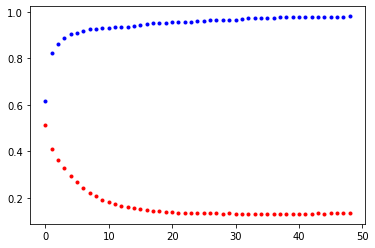

In [26]:
# 모델 반복횟수에 따른 정확도 및 loss를 그래프로 확인
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, 'o', c='red',markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue',markersize=3)
plt.show()

In [30]:
#학습기 불러오기
from keras.models import load_model
# model.save('09-0.0902.hdf5')
model_1 = load_model('./credit_50/39-0.1315.hdf5')


#평가
print(model_1 .evaluate(X_test,Y_test))

#예측
prediction = model_1.predict(X_test)
# print(prediction)
부정자용자 =int(input('가져올 데이터 번호'))
부정사용 = prediction[부정자용자]
p=부정사용[0]*100
print(f'신용카드를 부정사용 확률은 {p}%입니다.')

5/5 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9392
[0.1623658388853073, 0.9391891956329346]
가져올 데이터 번호21
신용카드를 부정사용 확률은 99.72724914550781%입니다.


In [34]:
y_pred_t = np.round(prediction, 1)
print(y_pred_t)
# if y_pred_t[0] >= 0.8:
#     return 

# y_pred_t = y_pred_t.astype(int)
# y_pred_t.shape

[[1. ]
 [0. ]
 [0. ]
 [0.9]
 [1. ]
 [1. ]
 [0.1]
 [1. ]
 [0.2]
 [1. ]
 [1. ]
 [0.1]
 [0.5]
 [1. ]
 [0.5]
 [0.7]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [0.6]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [1. ]
 [0.1]
 [1. ]
 [0. ]
 [0.9]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0.1]
 [0.2]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [1. ]
 [0. ]
 [1. ]
 [0. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [0. ]
 [0.4]
 [1. ]
 [0. ]
 [1. ]
 [1. ]
 [0.7]
 [1. ]
 [0.1]
 [0.1]
 [0. ]
 [0. ]
 [0.3]
 [1. ]
 [1. ]
 [0. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [0. ]
 [0.1]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [1. ]
 [1. ]
 [0.2]
 [1. ]
 [0. ]
 [0. ]
 [0.4]
 [1. ]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [0.1]
 [0. ]
 [1. ]
 [1. ]
 [0.1]
 [0. ]
 [1. ]
 [0. ]
 [1. ]
 [0. ]
 [0.4]
 [0. ]
 [1. ]
 [1. ]
 [0. ]
 [1. ]
 [0. ]
 [0.1]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [0.6]
 [0. ]
 [0.1]
 [1. ]
 [0.1]
 [0.9]
 [0.3]
 [1. ]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]

In [ ]:
Y_test_t = Y_test.astype(int)
Y_test_t = Y_test_t.reshape(-1,1)

In [ ]:
Y_test_t.shape

In [ ]:
# 예측값과 실제값 다른것들만 들고와서 보여주기위함
miss = np.where(Y_test_t != y_pred_t)[0]
miss

In [ ]:
# 몇개 잘못 분류 했나?
len(miss)

In [ ]:
i=np.random.choice(miss)
print("%s번째학습데이터의 True값은 : %s인데, Predic값은 : %s이다"%(i,Y_test_t[i],y_pred_t[i]))